In [1]:
# ==================================================== #
#        Load Required Libraries
# ==================================================== #

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from tensorflow import keras

# Import other tools
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


print("*"*72)
%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:".center(72))
print("="*72)

%watermark -iv
print("*"*72)
%load_ext nb_js_diagrammers

************************************************************************
Author: Dr. Saad Laouadi

Last updated: 2025-02-10

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

                 Imported Packages and Their Versions:                  
matplotlib: 3.9.2
numpy     : 1.26.4
tensorflow: 2.16.2
keras     : 3.6.0
sklearn   : 1.5.1

************************************************************************


In [2]:
%%mermaid_magic
graph TD
    %% Input Layer
    subgraph Input
        I[Input Layer<br>6 neurons]
    end

    %% Hidden Layers
    subgraph Hidden1[Hidden Layer 1]
        H1[Dense Layer<br>128 neurons<br>ReLU]
    end

    subgraph Hidden2[Hidden Layer 2]
        H2[Dense Layer<br>64 neurons<br>ReLU]
    end

    subgraph Hidden3[Hidden Layer 3]
        H3[Dense Layer<br>32 neurons<br>ReLU]
    end

    %% Output Layer
    subgraph Output
        O[Dense Layer<br>3 neurons<br>Softmax]
    end

    %% Connections
    I --> |Dense| H1
    H1 --> |Dense| H2
    H2 --> |Dense| H3
    H3 --> |Dense| O

    %% Layer Details
    Details1[Layer Size: 6 → 128<br>Activation: ReLU] --- H1
    Details2[Layer Size: 128 → 64<br>Activation: ReLU] --- H2
    Details3[Layer Size: 64 → 32<br>Activation: ReLU] --- H3
    Details4[Layer Size: 32 → 3<br>Activation: Softmax] --- O

    %% Styling
    classDef input fill:#f9f,stroke:#333,stroke-width:2px
    classDef hidden fill:#bbf,stroke:#333,stroke-width:2px
    classDef output fill:#bfb,stroke:#333,stroke-width:2px
    classDef details fill:none,stroke:none
    
    class I input
    class H1,H2,H3 hidden
    class O output
    class Details1,Details2,Details3,Details4 details

In [3]:
%%mermaid_magic -h 800
graph LR
    %% Input Layer
    subgraph IL[Input Layer]
        I1((x₁))
        I2((x₂))
        I3((x₃))
        I4((...))
        I5((x₅))
        I6((x₆))
    end
    %% Hidden Layer 1
    subgraph HL1[Hidden Layer 1]
        H1_1((h¹₁))
        H1_2((h¹₂))
        H1_3((...))
        H1_4((h¹₁₂₈))
    end
    %% Hidden Layer 2
    subgraph HL2[Hidden Layer 2]
        H2_1((h²₁))
        H2_2((h²₂))
        H2_3((...))
        H2_4((h²₆₄))
    end
    %% Hidden Layer 3
    subgraph HL3[Hidden Layer 3]
        H3_1((h³₁))
        H3_2((h³₂))
        H3_3((...))
        H3_4((h³₃₂))
    end
    %% Output Layer
    subgraph OL[Output Layer]
        O1((y₁))
        O2((y₂))
        O3((y₃))
    end
    %% Dense Connections between Input and First Hidden Layer
    I1 --> H1_1 & H1_2 & H1_3 & H1_4
    I2 --> H1_1 & H1_2 & H1_3 & H1_4
    I3 --> H1_1 & H1_2 & H1_3 & H1_4
    I5 --> H1_1 & H1_2 & H1_3 & H1_4
    I6 --> H1_1 & H1_2 & H1_3 & H1_4
    %% Dense Connections between Hidden Layers 1 and 2
    H1_1 --> H2_1 & H2_2 & H2_3 & H2_4
    H1_2 --> H2_1 & H2_2 & H2_3 & H2_4
    H1_4 --> H2_1 & H2_2 & H2_3 & H2_4
    %% Dense Connections between Hidden Layers 2 and 3
    H2_1 --> H3_1 & H3_2 & H3_3 & H3_4
    H2_2 --> H3_1 & H3_2 & H3_3 & H3_4
    H2_4 --> H3_1 & H3_2 & H3_3 & H3_4
    %% Dense Connections to Output Layer
    H3_1 --> O1 & O2 & O3
    H3_2 --> O1 & O2 & O3
    H3_4 --> O1 & O2 & O3
    %% Activation Functions
    AF1[ReLU] -.- HL1
    AF2[ReLU] -.- HL2
    AF3[ReLU] -.- HL3
    AF4[Softmax] -.- OL
    %% Styling
    classDef default fill:#fff,stroke:#333,stroke-width:2px
    classDef inputStyle fill:#f9f,stroke:#333,stroke-width:2px
    classDef hiddenStyle fill:#bbf,stroke:#333,stroke-width:2px
    classDef outputStyle fill:#bfb,stroke:#333,stroke-width:2px
    classDef afStyle fill:none,stroke:none
    
    class I1,I2,I3,I4,I5,I6 inputStyle
    class H1_1,H1_2,H1_3,H1_4,H2_1,H2_2,H2_3,H2_4,H3_1,H3_2,H3_3,H3_4 hiddenStyle
    class O1,O2,O3 outputStyle
    class AF1,AF2,AF3,AF4 afStyle

In [4]:
def generate_data(n_samples=10000, n_features=6, n_classes=3):
    """
    Generate synthetic data using sklearn's make_classification
    
    Args:
        n_samples: Number of samples to generate
        n_features: Number of features
        n_classes: Number of target classes
        
    Returns:
        X: Features array
        y: Target array
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_classes=n_classes,
        n_informative=6,  # All features are informative
        n_redundant=0,
        n_repeated=0,
        random_state=42
    )
    
    return X, y

def preprocess_data(X, y):
    """
    Preprocess the data: scale features and split into train/test sets
    
    Args:
        X: Features array
        y: Target array
        
    Returns:
        Scaled and split data
    """
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Convert target to one-hot encoding
    y_onehot = tf.keras.utils.to_categorical(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_onehot, 
        test_size=0.2, 
        random_state=42
    )
    
    return X_train, X_test, y_train, y_test


def create_model(input_shape, n_classes):
    """
    Create the neural network model using Keras Sequential API
    
    Args:
        input_shape: Shape of input features
        n_classes: Number of target classes
        
    Returns:
        Compiled Keras model
    """
    # Create sequential model
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=input_shape, name='input_layer'),
        
        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu', name='hidden_1'),
        tf.keras.layers.Dense(64, activation='relu', name='hidden_2'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_3'),
        
        # Output layer
        tf.keras.layers.Dense(n_classes, activation='softmax', name='output')
    ], name='classification_model')
    
    return model

def compile_model(model):
    """
    Compile the model with appropriate loss, optimizer and metrics
    
    Args:
        model: Keras model
    """
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    
def train_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    """
    Train the model and return training history
    
    Args:
        model: Compiled Keras model
        X_train, y_train: Training data
        X_test, y_test: Test data
        epochs: Number of training epochs
        batch_size: Batch size
        
    Returns:
        Training history
    """
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    
    return history


def plot_training_history(history):
    """
    Plot training and validation metrics
    
    Args:
        history: Training history from model.fit()
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [5]:
# Train the FFNN model
# ===================
# Generate synthetic data
X, y = generate_data()

In [6]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(X, y)

In [7]:
# Create model
model = create_model(input_shape=(6,), n_classes=3)

# Display model summary
model.summary()

Model: "classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,331 (44.26 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile model
compile_model(model)

In [9]:
# Train model
history = train_model(model, X_train, y_train, X_test, y_test)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7214 - loss: 0.6759 - val_accuracy: 0.8505 - val_loss: 0.3822
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8774 - loss: 0.3210 - val_accuracy: 0.8895 - val_loss: 0.3144
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9018 - loss: 0.2622 - val_accuracy: 0.8935 - val_loss: 0.2963
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9050 - loss: 0.2477 - val_accuracy: 0.9025 - val_loss: 0.2780
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9199 - loss: 0.2229 - val_accuracy: 0.9055 - val_loss: 0.2693
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9252 - loss: 0.2094 - val_accuracy: 0.9160 - val_loss: 0.2585
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9249 - loss: 0.2228 - val_accuracy: 0.9180 - val_loss: 0.2471
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9286 - loss: 0.1981 - val_accuracy: 0.

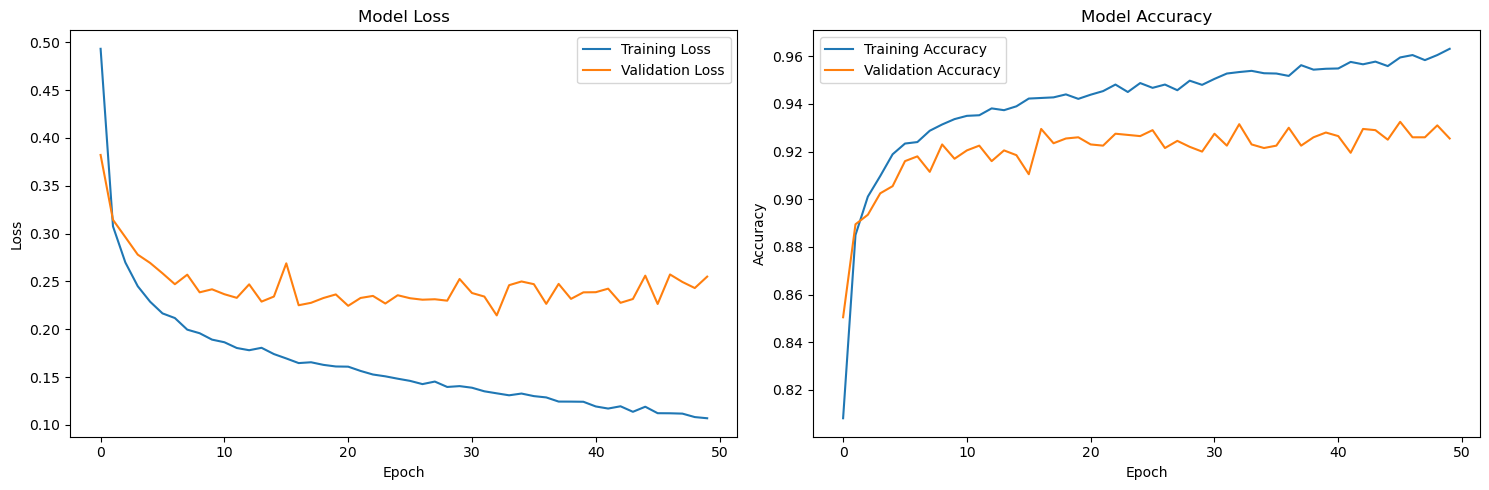

In [10]:
# Plot training history
plot_training_history(history)

In [11]:
# Evaluate final model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9255
